In [1]:
import pandas as pd

from fuzzywuzzy import fuzz

from nltk.corpus import stopwords
from nltk.corpus import swadesh
from nltk.probability import FreqDist
from nltk.text import Text
import nltk.text
from nltk.tokenize import word_tokenize

from matplotlib import pyplot as plt


In [24]:
def convertionRow(row):
    try:
        row=row.split()
        words=[max_ratio(x) for x in row]
        row=' '.join(words)
        return w
    except :
        return row
    
def max_ratio(w):
    try:
        dic = ['parte', 'circulaba', 'delantera', 'delantero', 'delante', 'enfrente', 'izquierda', 'izquierdo',
               'derecha', 'lateral', 'colisiona', 'colision', 'colisiono', 'colisionada', 'colisionado', 'colisionando',
               'trasero', 'trasera',
               'impacta', 'impacto', 'impactado', 'impactada', 'embiste', 'embistio', 'embestido', 'iba', 'venia',
               'frente', 'lado', 'detras', 'atras', 'costado', 'choca', 'choco', 'chocando', 'choque', 'costado',
               'frontal', 'asegurado', 'cae', 'venia', 'piso', 'aseg', 'lesiones', 'medios', 'vehiculo', 'ocupante',
               'persona',
               'datos', 'propios', 'desplazamientos', 'solo', 'llegar', 'puerta', 'cayo', 'ultima', 'hecho', 'caen',
               'maniobra', 'acompanante', 'segun', 'pavimento', 'hospital', 'espejo', 'ambos', 'habia', 'suelo',
               'tenia', 'frena', 'mecanica', 'levanta', 'ocupantes', 'momento', 'dolor', 'velocidad', 'version',
               'personas', 'san', 'asfalto', 'marcha', 'llevaba', 'retira', 'mismo', 'sola', 'produce', 'ingresar',
               'puesto', 'trasladado', 'luz', 'presentaba', 'retiro', 'maniobro', 'tomar', 'asfalto','avenida','doblo','doblar']

        aux = 0
        word = ''
        for i in dic:
            if aux <= fuzz.ratio(w, i) and 80 <= fuzz.ratio(w, i) :
                aux = fuzz.ratio(w, i)
                word = i
        # print(w,word)
        if word != '':
            return word
        return w
        # return w hay que poner para usar, mientras me sirve para evaluar
    except TypeError:
        return w
    
def cleanHpx(row,hpx):
    try:
        row=row.split()
        words=[x for x in row if x not in hpx]
        row=' '.join(words)
        return w
    except :
        return row

def deleteFrequence(freq, tokens, value):
    deletetokens = []
    for w in tokens:
        if freq[w] <= value:
            # text = re.sub('\bw\b', '',text)
            deletetokens.append(w)
    # print(deletetokens)
    return deletetokens

In [3]:
def stat(serie):
    '''Devuelve tokens,nltkText y f de frecuencia'''
    fstring = ''
    for row in serie:
        try:
            fstring += row + ' '
        except:
            continue
    tokens = word_tokenize(fstring)
    nltkText = Text(tokens)
    f = FreqDist(nltkText)
    return tokens,nltkText,f

In [25]:
dataset = pd.read_csv('../dataset/casos_filtrados/casos_filtrados_fuzz.csv')

In [26]:
dataset['fuzzy'] = dataset['descripcion_del_hecho - Final']

In [27]:
dataset['fuzzy']=dataset['fuzzy'].apply(convertionRow)

In [28]:
dataset = dataset.drop(columns='Unnamed: 0')

In [29]:
dataset.head()

,cod_accidente,descripcion_del_hecho - Final,responsabilidad,fuzzy
0,am,mecanica hecho s vs asegurado asegurado circul...,comprometida,mecanica hecho s vs asegurado asegurado circul...
1,otros,asegurado empedrada pidar via tranvia pierde e...,comprometida,asegurado empedrada pidar via tranvia pierde e...
2,am,aseg circulando maipu ingresar garage colision...,comprometida,aseg circulando maipu ingresar garage colision...
3,am,asegurado estacionado boticelli descender impa...,comprometida,asegurado estacionado boticelli descender impa...
4,am,circulando independencia llegar boedo guino co...,comprometida,circulando independencia llegar boedo guino co...


dataset.to_csv('../dataset/casos_filtrados/casos_filtrados_refuzz.csv',index=False)

In [31]:
dataset=pd.read_csv('../dataset/casos_filtrados/casos_filtrados_refuzz.csv')

In [32]:
tokens,nltkText,f = stat(dataset['fuzzy'])

In [33]:
hpx=f.hapaxes()

In [34]:
dataset['no_hpx']=dataset['fuzzy']

In [35]:
dataset['no_hpx']=dataset['no_hpx'].apply(lambda x: cleanHpx(x,hpx))

dataset.to_csv('../dataset/casos_filtrados/casos_filtrados_noHpx.csv',index=False)

In [36]:
rat = range(len(tokens))
k=0
for i in rat:
    if tokens[i-k] in hpx:
        tokens.remove(tokens[i-k])
        k+=1

In [14]:
dataset.to_csv('../dataset/casos_filtrados/casos_filtrados_refuzz2.csv',index=False)

### Cuando ya le sacamos los hapaxes volvemos a ver las estadisticas

In [37]:
tokens,nltkText,f = stat(dataset['no_hpx'])

In [40]:
f2 = deleteFrequence(f,tokens,2)

### Quitamos las de frecuencia 2

In [41]:
dataset['no_f2']=dataset['no_hpx'].apply(lambda x: cleanHpx(x,f2))

dataset.to_csv('../dataset/casos_filtrados/casos_filtrados_noF2.csv',index=False)

In [43]:
tokens,nltkText,f = stat(dataset['no_hpx'])

In [44]:
f3 = deleteFrequence(f,tokens,3)

In [45]:
dataset['no_f2']=dataset['no_hpx'].apply(lambda x: cleanHpx(x,f3))

In [46]:
tokens,nltkText,f = stat(dataset['no_f2'])

In [47]:
f_dic=dict(f)

In [59]:
con_idx=nltk.text.ConcordanceIndex(nltkText)

In [60]:
dataset['parte'] = pd.Series([' '.join(i[0][:5]) +' '+i[1]+' '+' '.join(i[2][:5]) for i in con_idx.find_concordance('parte')])

#### el colisiona tiene que buscar todas las palabras que tengan la raíz 'colis'

In [61]:
colis=[]
for i in con_idx.tokens():
    if i.startswith('colis'):
        colis.append(i)

In [62]:
colis = list(set(colis))

In [65]:
#dataset=dataset.drop(columns='colisiona')
aux=[]
for j in colis:
    aux=[' '.join(i[0][:5]) +' '+i[1]+' '+' '.join(i[2][:5]) for i in con_idx.find_concordance(j)]

In [66]:
dataset['colis'] = pd.Series(aux)

dataset.to_csv('../dataset/descripciones_pivotes.csv')

## Dispersion plot

In [98]:
#dataset['parte'][0].split()
w_parte=[]
for row in dataset['parte']:
    try:
        row=row.split()
        w_parte += [i for i in row]
    except:
        continue

w_parte=list(set(w_parte))

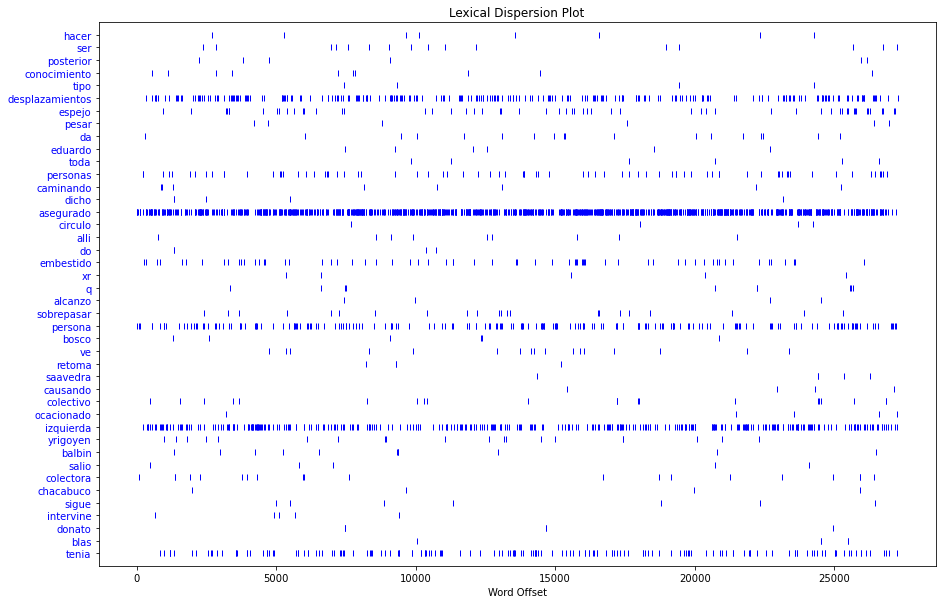

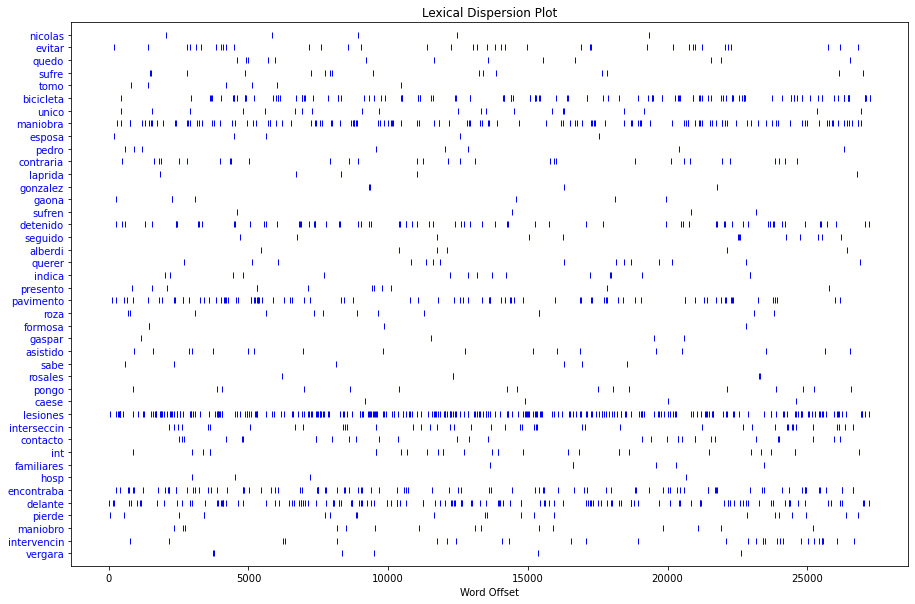

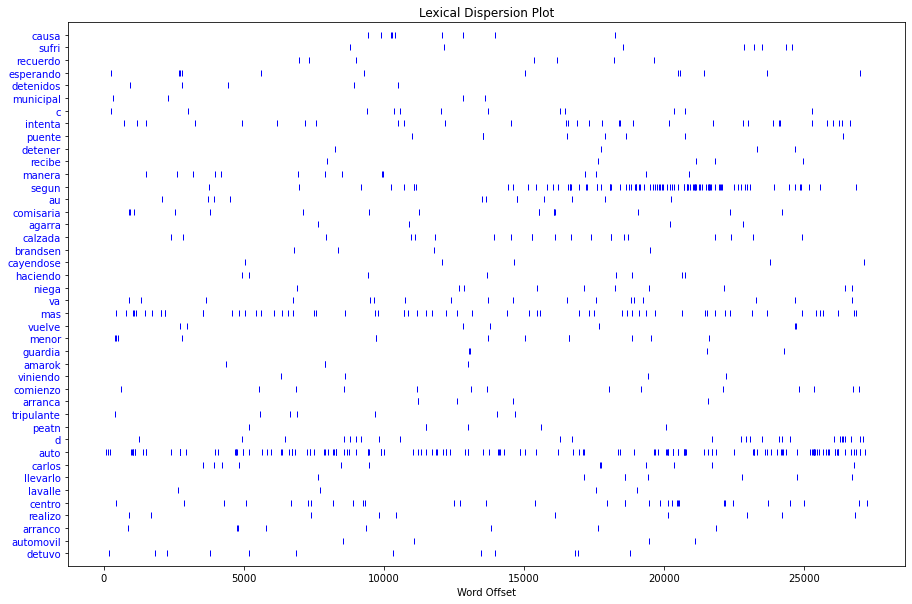

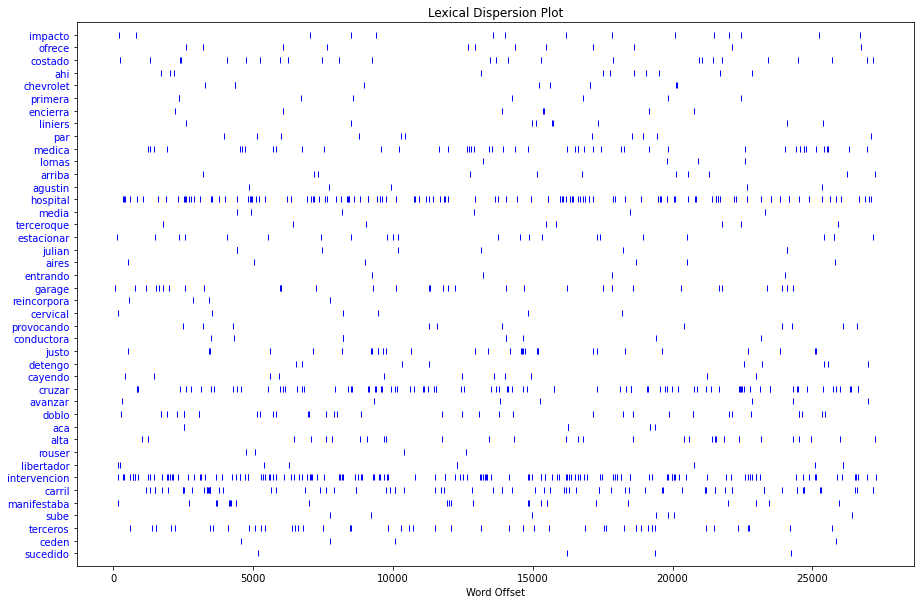

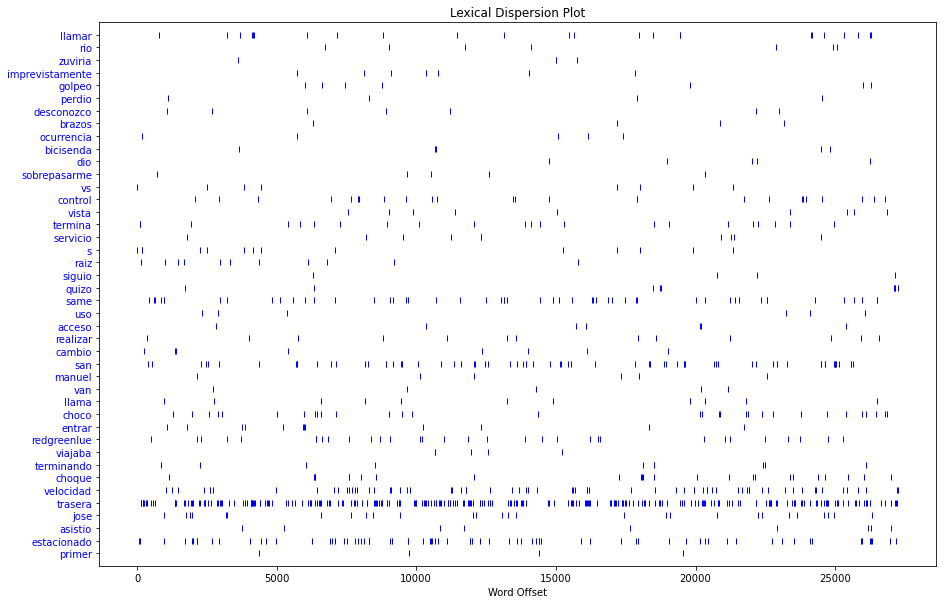

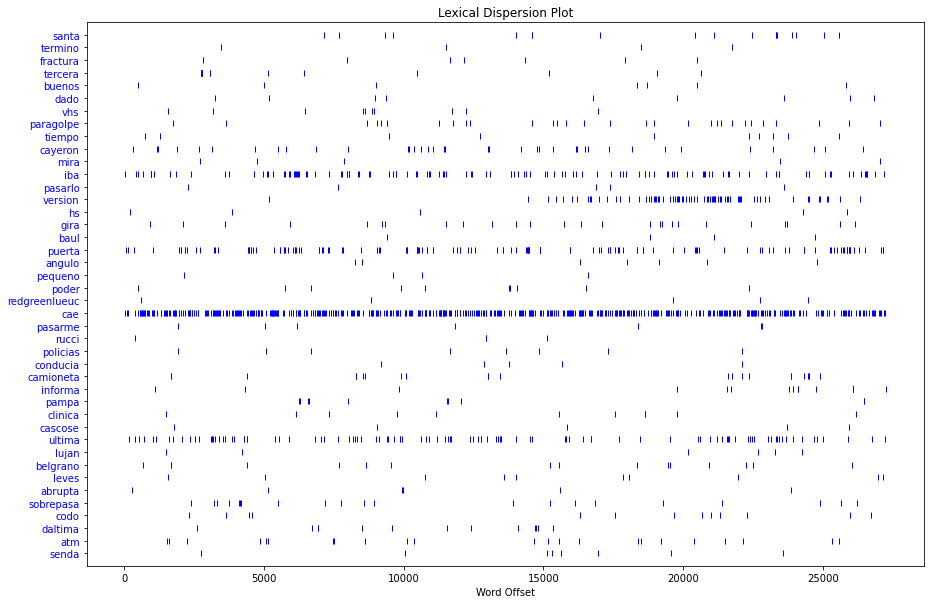

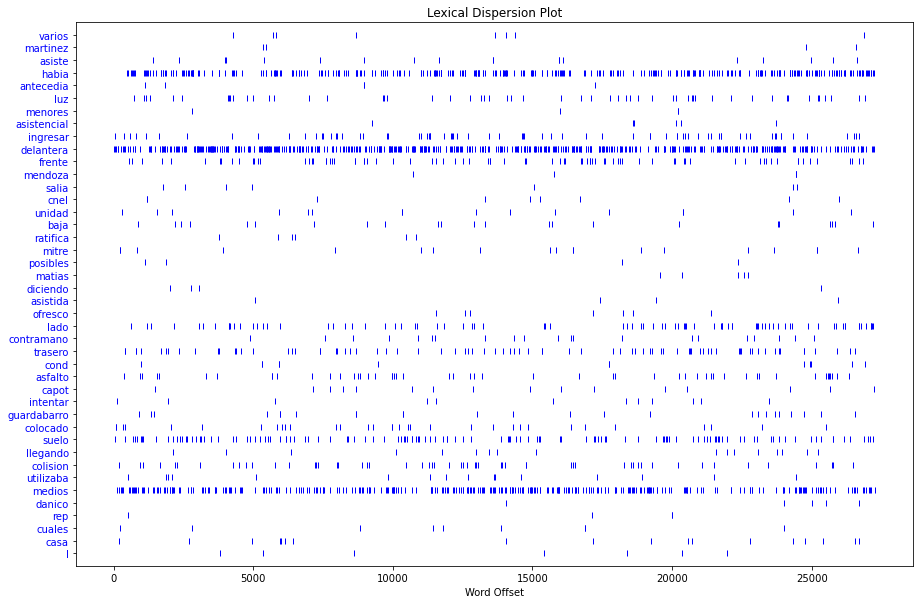

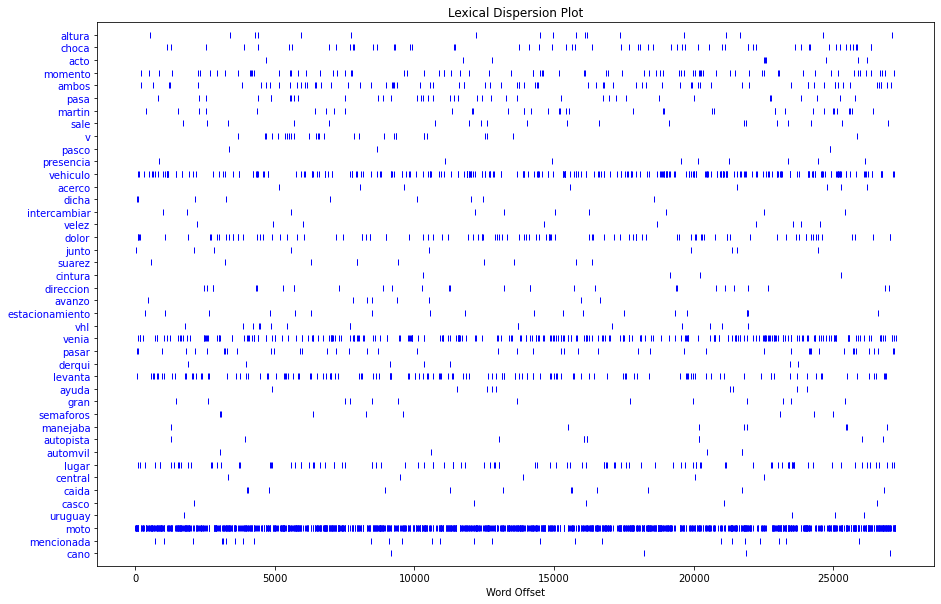

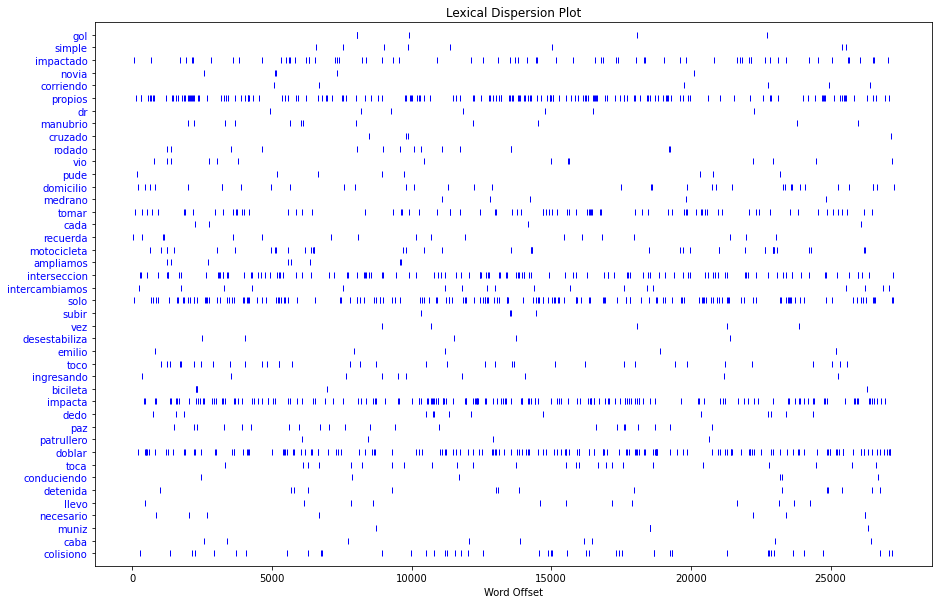

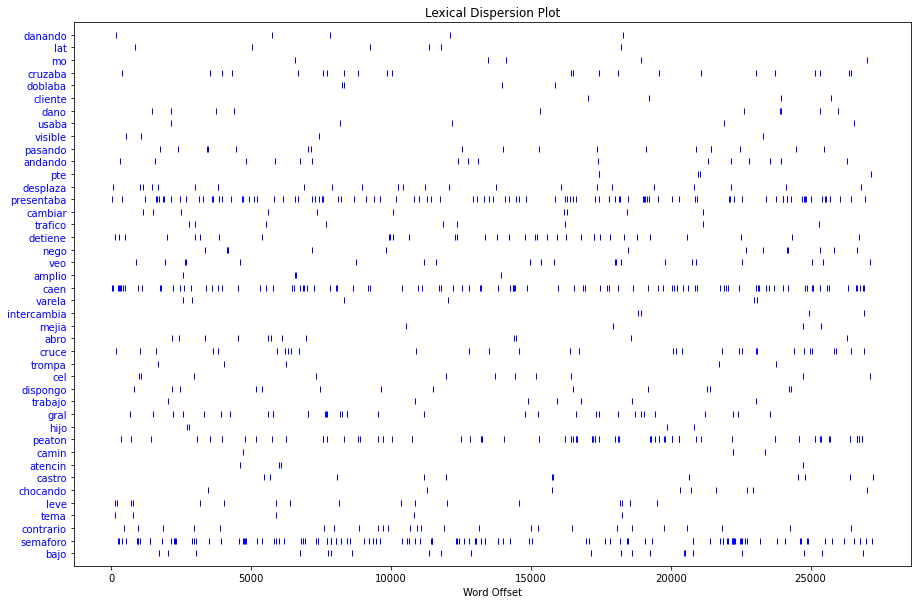

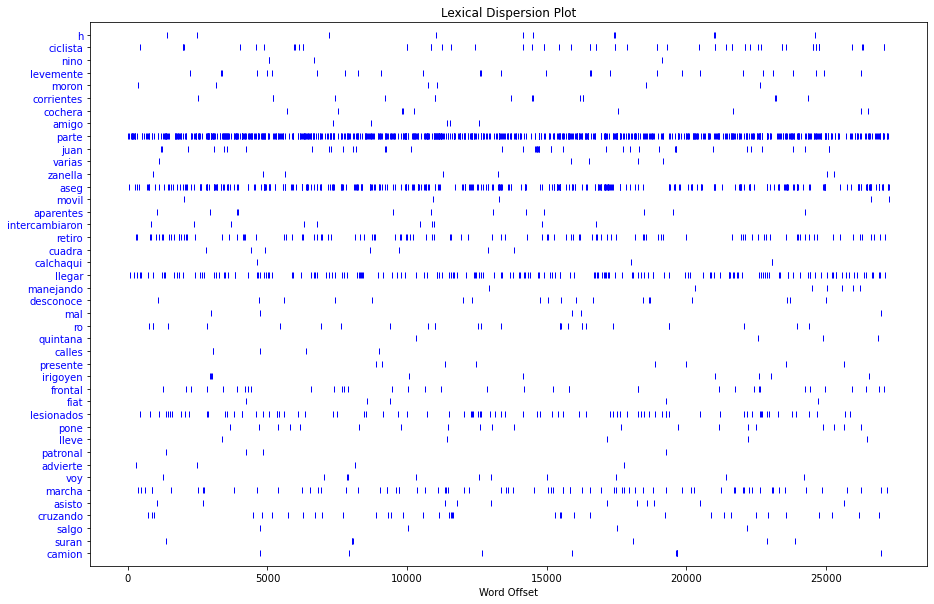

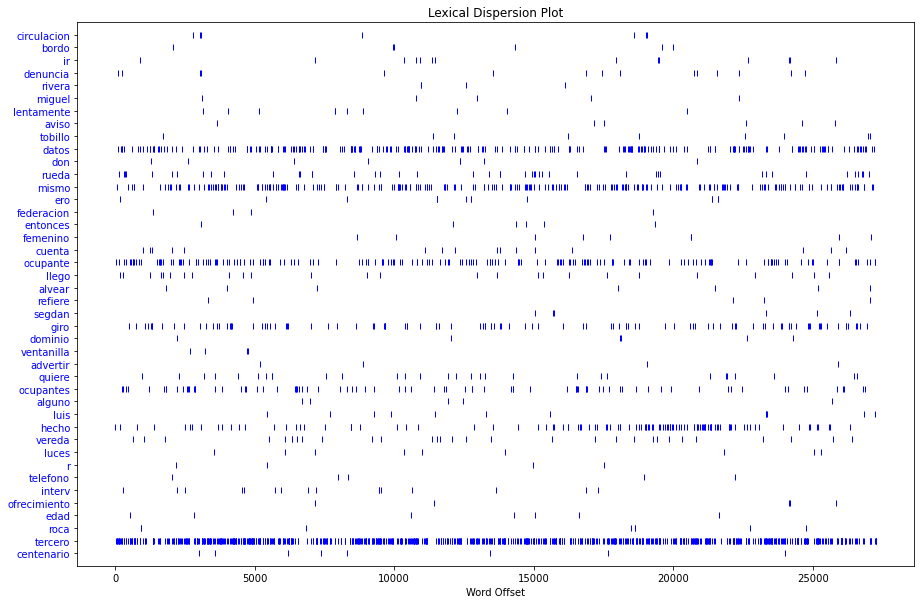

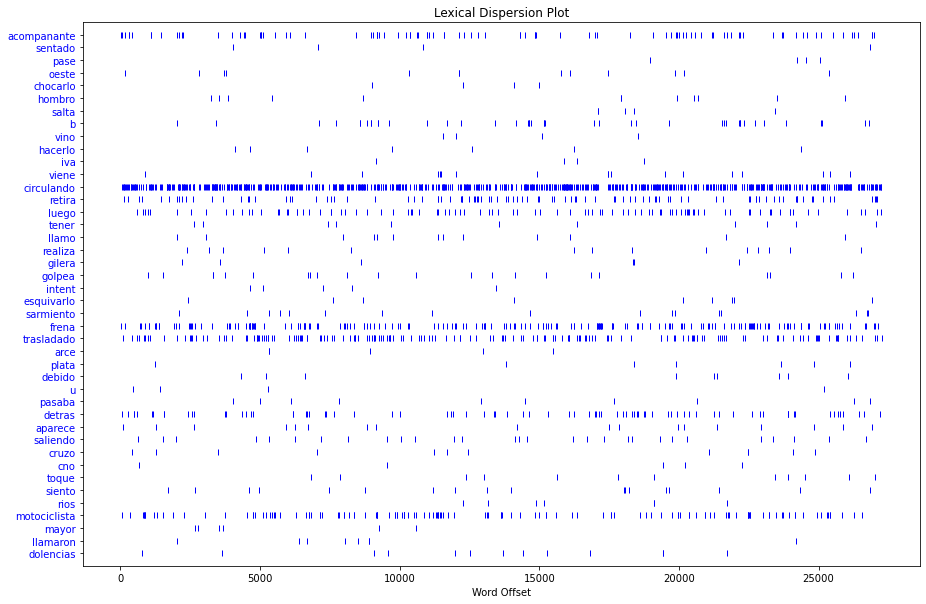

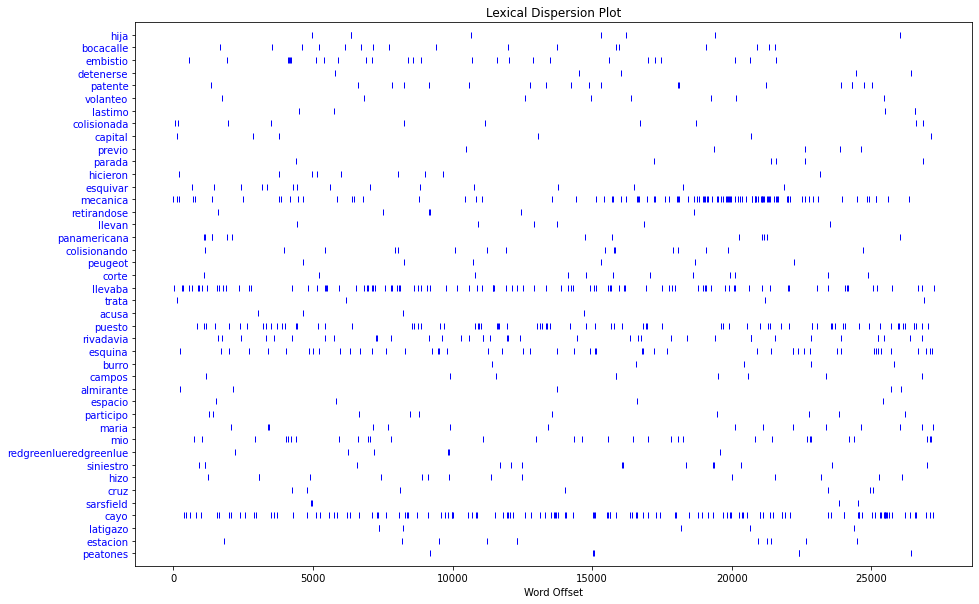

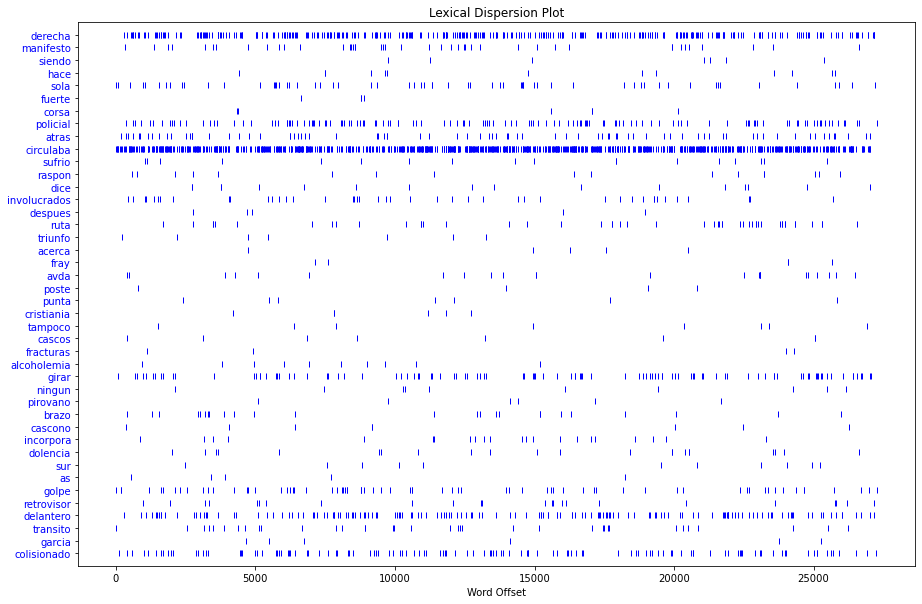

In [99]:
for i in range(1,16):
    fig=plt.figure(figsize=(15,10))
    pl=nltkText.dispersion_plot(w_parte[len(w_parte)//16*(i-1):len(w_parte)//16*i])
    #fig.savefig('../dataset/parte/parte_'+str(i)+'.png')

In [100]:
#dataset['parte'][0].split()
w_parte=[]
for row in dataset['colis']:
    try:
        row=row.split()
        w_parte += [i for i in row]
    except:
        continue

w_parte=list(set(w_parte))

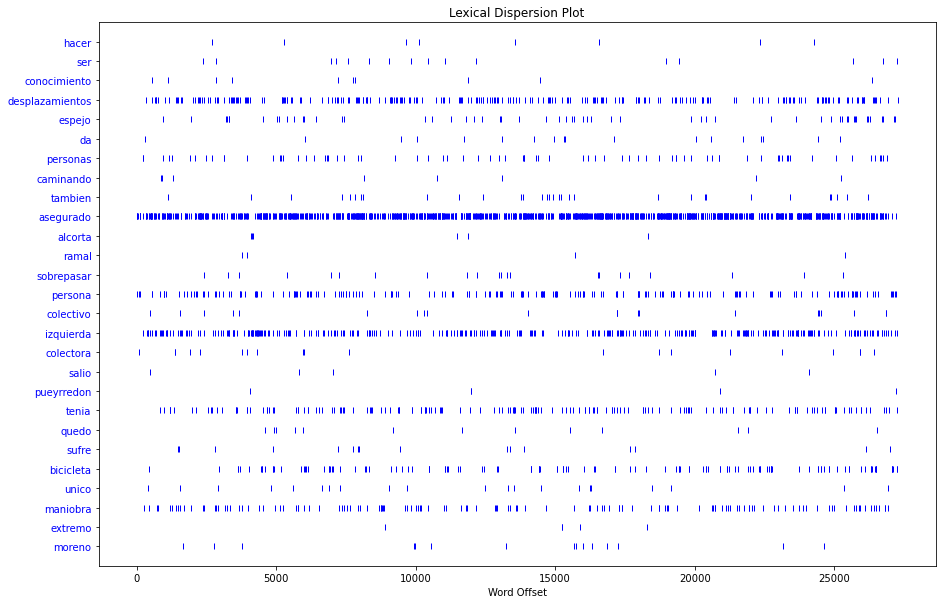

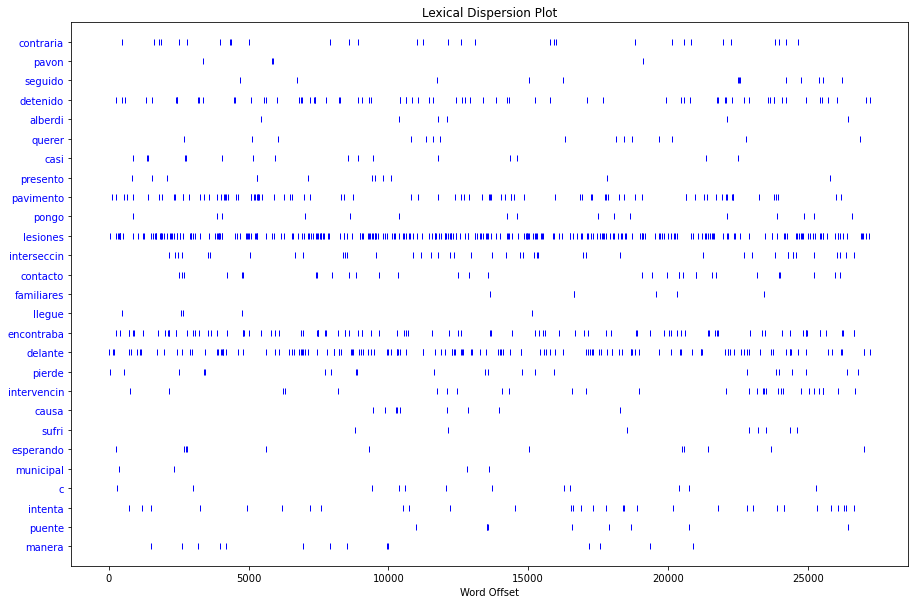

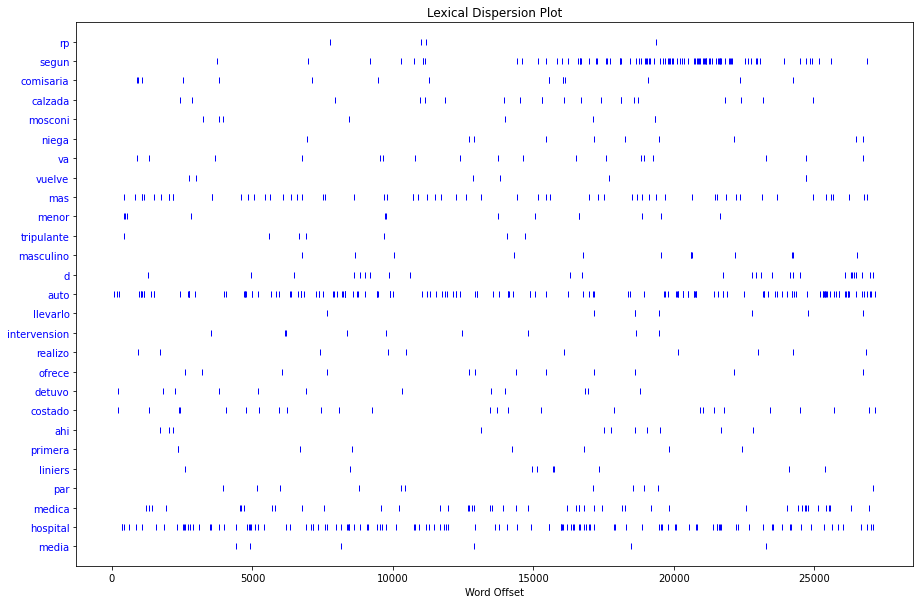

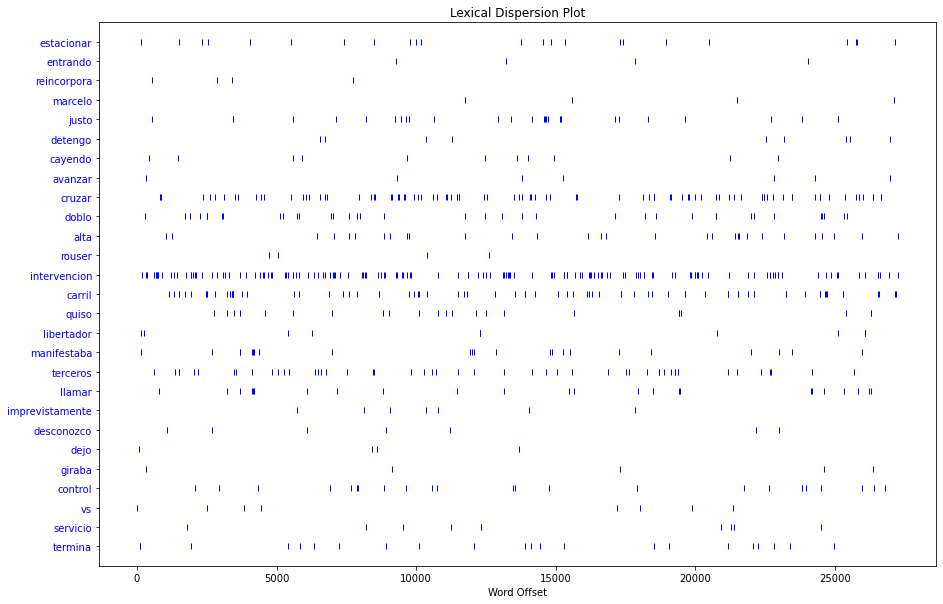

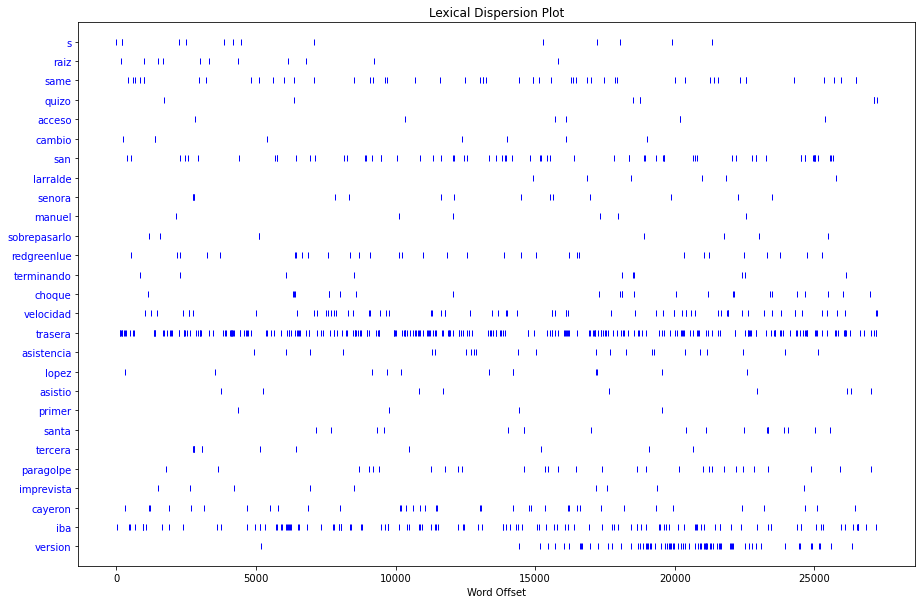

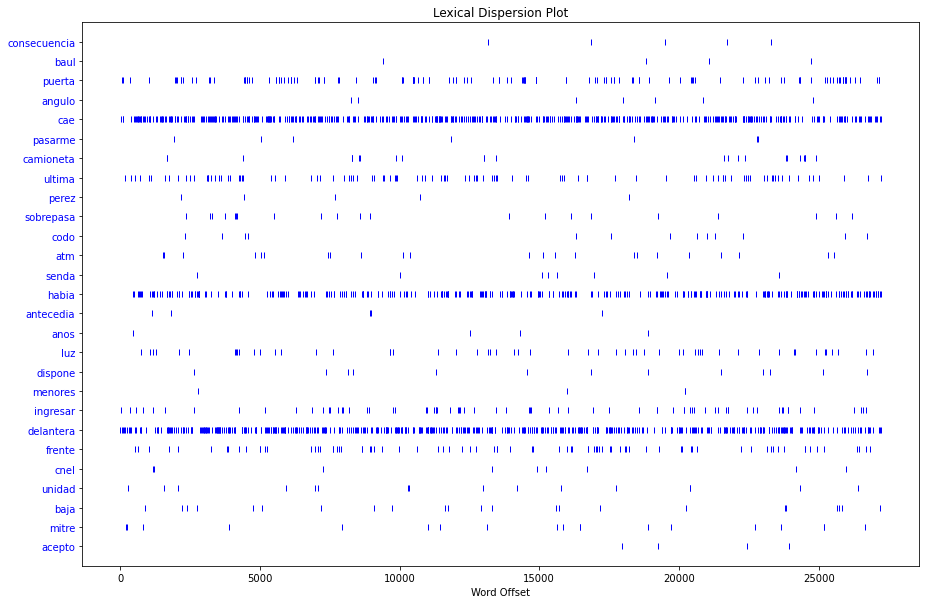

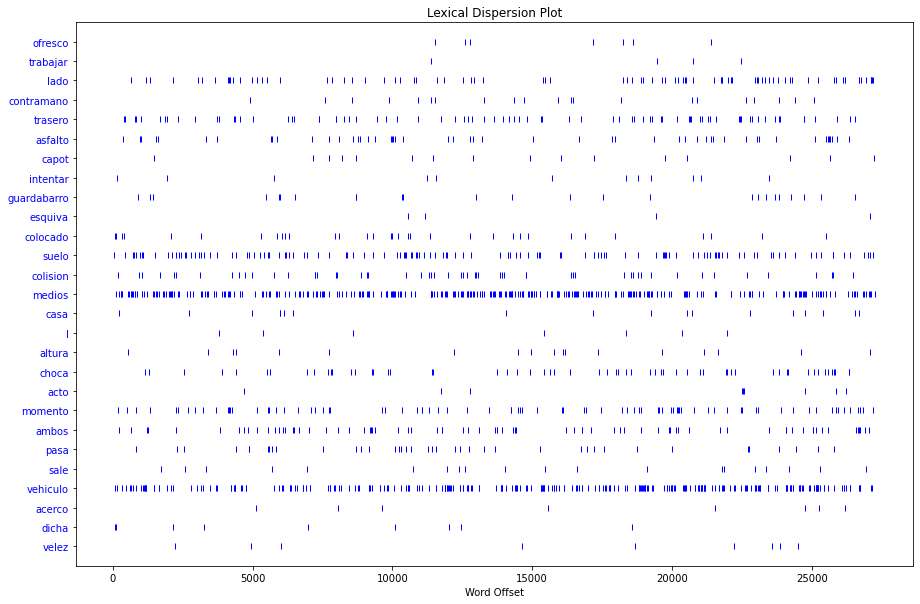

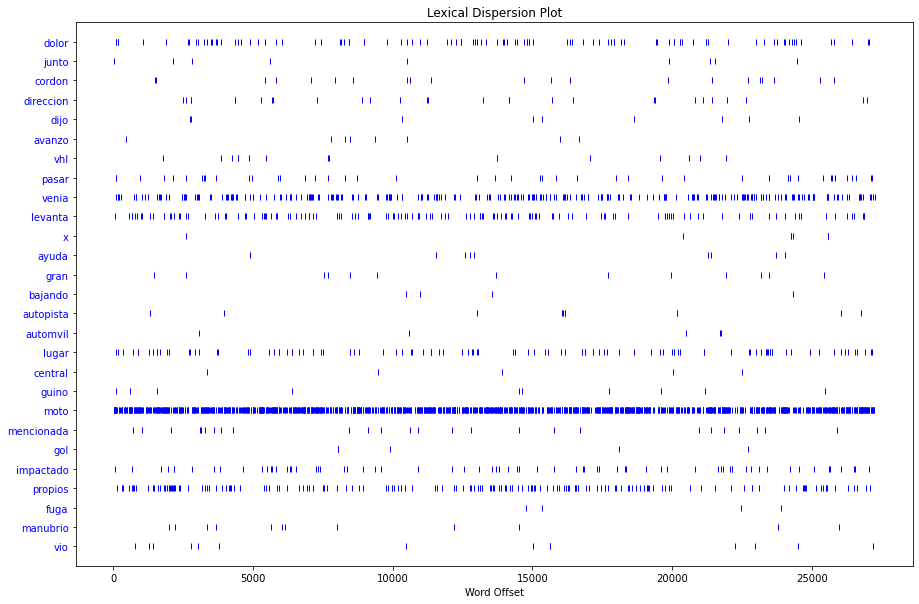

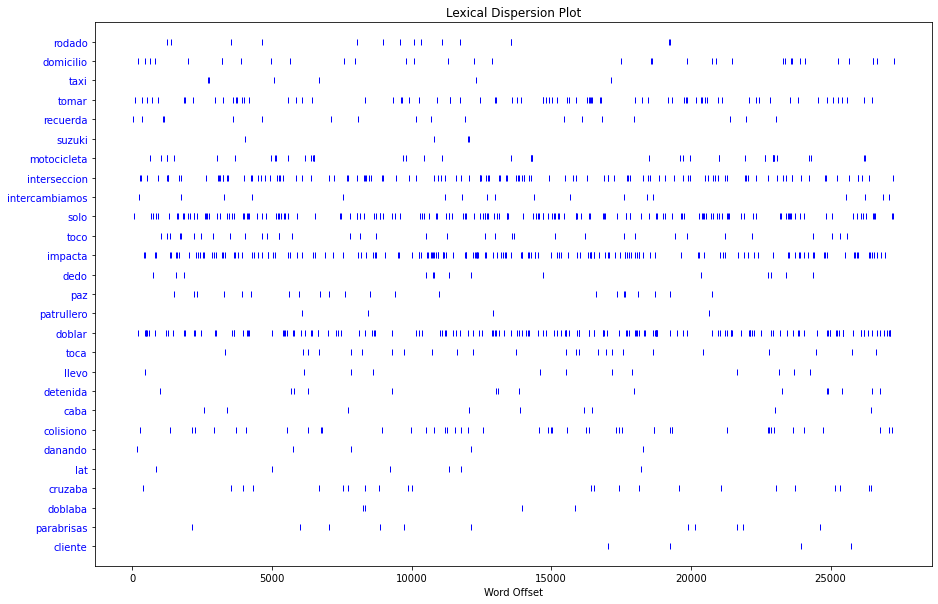

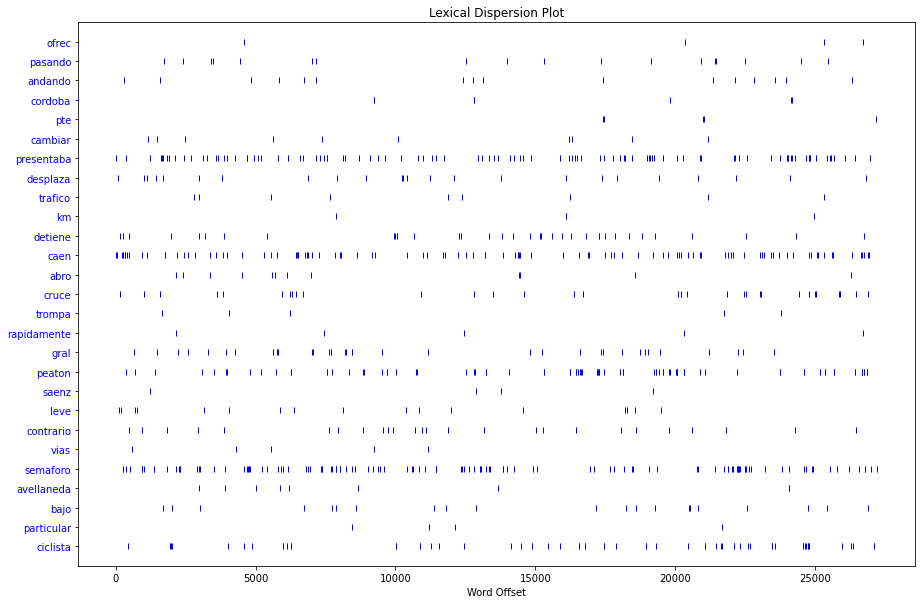

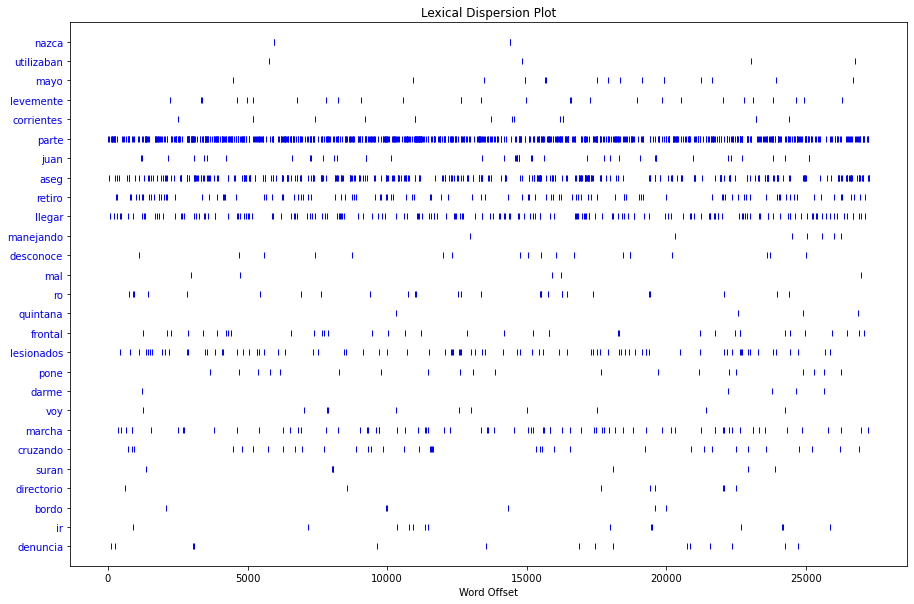

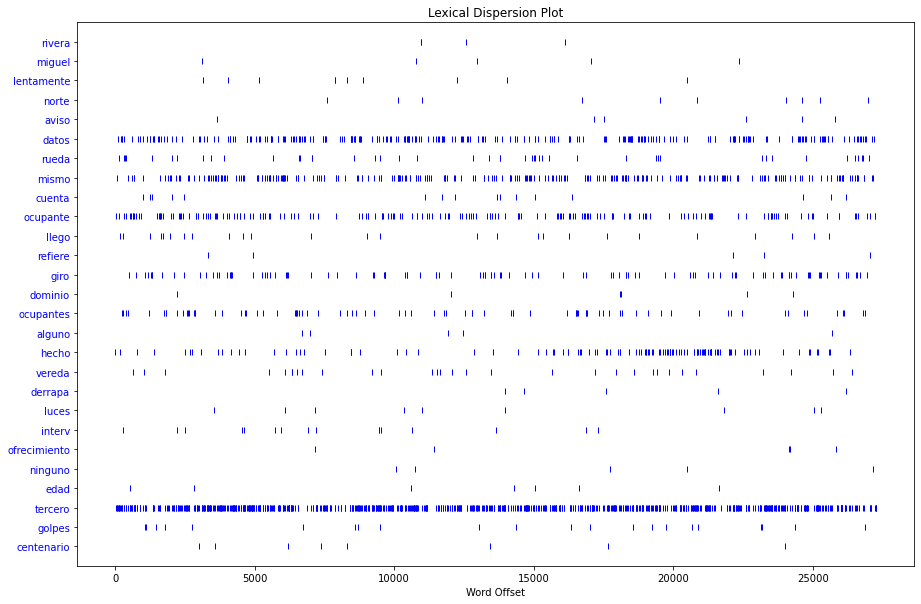

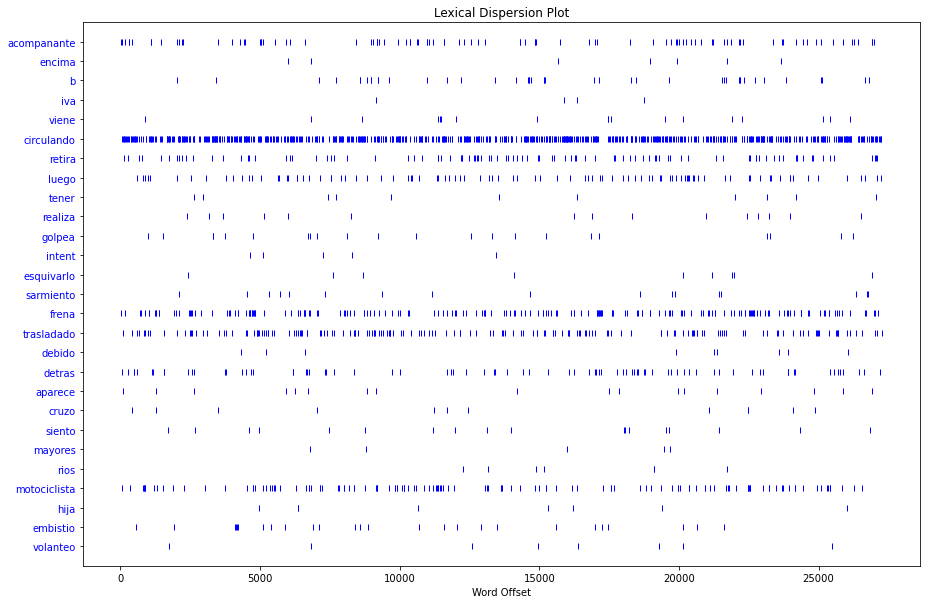

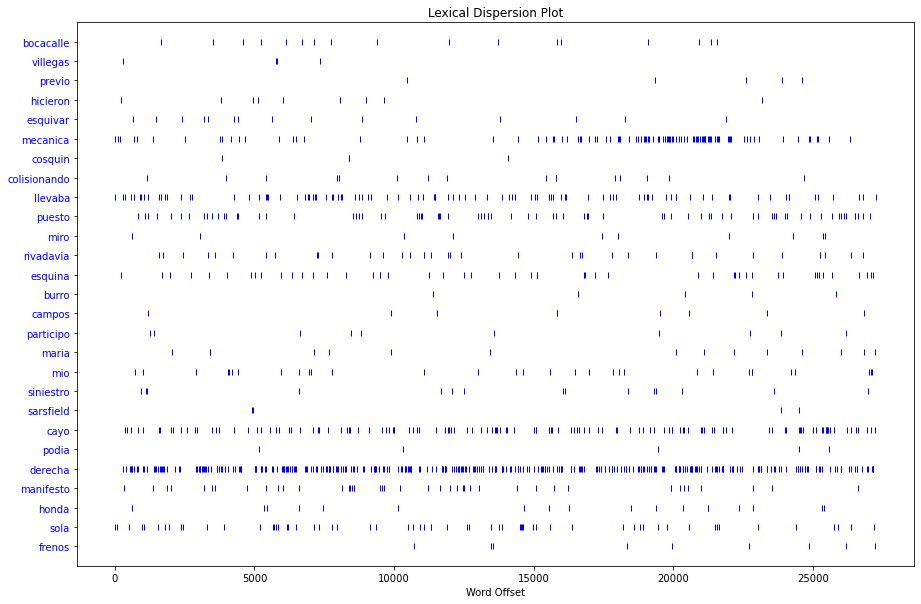

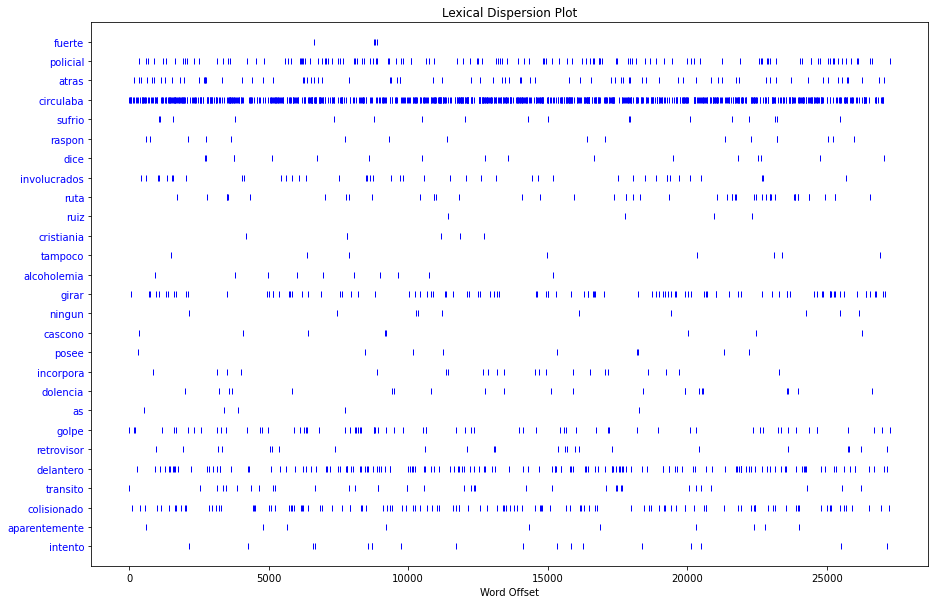

In [102]:
for i in range(1,16):
    fig=plt.figure(figsize=(15,10))
    pl=nltkText.dispersion_plot(w_parte[len(w_parte)//16*(i-1):len(w_parte)//16*i])
    #fig.savefig('../dataset/colis/colis_'+str(i)+'.png')